In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#Loading data
orders = pd.read_csv("/Users/seshasai/Downloads/data 2/orders_and_shipments.csv", encoding='ISO-8859-1')
inventory = pd.read_csv("/Users/seshasai/Downloads/data 2/inventory.csv")
fulfillment = pd.read_csv("/Users/seshasai/Downloads/data 2/fulfillment.csv")
print("Orders shape:", orders.shape)
print("Inventory shape:", inventory.shape)
print("Fulfillment shape:", fulfillment.shape)


Orders shape: (30871, 24)
Inventory shape: (4200, 4)
Fulfillment shape: (118, 2)


In [3]:
# Function to standardize column names?
def clean_columns(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('%', 'pct')
    return df

# Applying it to all the DataFrames
orders = clean_columns(orders)
inventory = clean_columns(inventory)
fulfillment = clean_columns(fulfillment)
print(orders.columns)


Index(['order_id', 'order_item_id', 'order_yearmonth', 'order_year',
       'order_month', 'order_day', 'order_time', 'order_quantity',
       'product_department', 'product_category', 'product_name', 'customer_id',
       'customer_market', 'customer_region', 'customer_country',
       'warehouse_country', 'shipment_year', 'shipment_month', 'shipment_day',
       'shipment_mode', 'shipment_days_-_scheduled', 'gross_sales',
       'discount_pct', 'profit'],
      dtype='object')


In [4]:
print(orders.isnull().sum())
print(inventory.isnull().sum())
print(fulfillment.isnull().sum())


order_id                     0
order_item_id                0
order_yearmonth              0
order_year                   0
order_month                  0
order_day                    0
order_time                   0
order_quantity               0
product_department           0
product_category             0
product_name                 0
customer_id                  0
customer_market              0
customer_region              0
customer_country             0
warehouse_country            0
shipment_year                0
shipment_month               0
shipment_day                 0
shipment_mode                0
shipment_days_-_scheduled    0
gross_sales                  0
discount_pct                 0
profit                       0
dtype: int64
product_name               0
year_month                 0
warehouse_inventory        0
inventory_cost_per_unit    0
dtype: int64
product_name                          0
warehouse_order_fulfillment_(days)    0
dtype: int64


In [54]:
print(orders.nunique())
print(inventory.nunique())
print(fulfillment.nunique())


order_id                     11072
order_item_id                30871
order_yearmonth                 36
order_year                       3
order_month                     12
order_day                       31
order_time                    1440
order_quantity                   5
product_department              11
product_category                49
product_name                   113
customer_id                   7987
customer_market                  5
customer_region                 23
customer_country               139
warehouse_country                2
shipment_year                    3
shipment_month                  12
shipment_day                    31
shipment_mode                    4
shipment_days_-_scheduled        4
gross_sales                    101
discount_pct                    17
profit                          78
order_date                    1096
shipping_date                 1094
shipping_delay                1399
net_sales                     1106
profit_margin       

In [55]:
print(orders.describe(include='all'))
print(inventory.describe(include='all'))
print(fulfillment.describe(include='all'))


            order_id  order_item_id  order_yearmonth    order_year  \
count   30871.000000   30871.000000     30871.000000  30871.000000   
unique           NaN            NaN              NaN           NaN   
top              NaN            NaN              NaN           NaN   
freq             NaN            NaN              NaN           NaN   
mean    35818.833792   89380.257361    201601.137411   2015.948657   
min        11.000000      29.000000    201501.000000   2015.000000   
25%     17905.000000   44721.500000    201509.000000   2015.000000   
50%     35886.000000   89624.000000    201606.000000   2016.000000   
75%     53507.000000  133710.500000    201702.000000   2017.000000   
max     77095.000000  180410.000000    201712.000000   2017.000000   
std     20623.809444   51279.388574        79.438616      0.796323   

         order_month     order_day order_time  order_quantity  \
count   30871.000000  30871.000000      30871    30871.000000   
unique           NaN         

In [53]:
print(orders.columns.tolist())


['order_id', 'order_item_id', 'order_yearmonth', 'order_year', 'order_month', 'order_day', 'order_time', 'order_quantity', 'product_department', 'product_category', 'product_name', 'customer_id', 'customer_market', 'customer_region', 'customer_country', 'warehouse_country', 'shipment_year', 'shipment_month', 'shipment_day', 'shipment_mode', 'shipment_days_-_scheduled', 'gross_sales', 'discount_pct', 'profit', 'order_date', 'shipping_date', 'shipping_delay', 'net_sales', 'profit_margin', 'year_month', 'order_hour', 'weekday']


In [8]:
print(inventory.columns.tolist())


['product_name', 'year_month', 'warehouse_inventory', 'inventory_cost_per_unit']


In [9]:
#Subsetting important fields for inspection
orders_subset = orders.loc[:, ['order_id', 'product_name', 'order_quantity', 'discount_pct']]
print(orders_subset.head())


   order_id                               product_name  order_quantity  \
0      3535  Field & Stream Sportsman 16 Gun Fire Safe               1   
1      4133  Field & Stream Sportsman 16 Gun Fire Safe               1   
2      7396  Field & Stream Sportsman 16 Gun Fire Safe               1   
3     11026  Field & Stream Sportsman 16 Gun Fire Safe               1   
4     11026  Field & Stream Sportsman 16 Gun Fire Safe               1   

  discount_pct  
0         0.25  
1         0.09  
2         0.06  
3         0.15  
4         0.13  


In [10]:
#Filter high quantity orders
high_quantity_orders = orders.loc[orders['order_quantity'] >= 5]
print(high_quantity_orders.head())


     order_id  order_item_id  order_yearmonth  order_year  order_month  \
828       973           2420           201501        2015            1   
829     13835          34659           201507        2015            7   
830     25991          65054           201601        2016            1   
831     29351          73431           201603        2016            3   
832     31981          79934           201604        2016            4   

     order_day order_time  order_quantity product_department product_category  \
828         15      04:32               5               Golf    Shop By Sport   
829         21      22:39               5               Golf    Shop By Sport   
830         15      09:27               5               Golf    Shop By Sport   
831          4      10:36               5               Golf    Shop By Sport   
832         11      20:01               5               Golf    Shop By Sport   

     ... customer_country  warehouse_country shipment_year shipment_

In [11]:
# Pivot table to find most ordered products
pivot_orders = orders.pivot_table(index='product_name', values='order_quantity', aggfunc='sum')
print(pivot_orders.head())


                                               order_quantity
product_name                                                 
Adult dog supplies                                         75
Baby sweater                                               37
Bag Boy Beverage Holder                                   150
Bag Boy M330 Push Cart                                     31
Bridgestone e6 Straight Distance NFL Carolina             133


In [12]:
# Convert discount to numeric and calculate net_sales and profit_margin
orders['discount_pct'] = pd.to_numeric(orders['discount_pct'], errors='coerce')
orders['net_sales'] = orders['gross_sales'] * (1 - orders['discount_pct'].fillna(0))
orders['profit_margin'] = orders['profit'] / orders['net_sales']
print(orders[['gross_sales', 'discount_pct', 'net_sales', 'profit', 'profit_margin']].head())


   gross_sales  discount_pct  net_sales  profit  profit_margin
0          400          0.25      300.0     200       0.666667
1          400          0.09      364.0     200       0.549451
2          400          0.06      376.0     200       0.531915
3          400          0.15      340.0     200       0.588235
4          400          0.13      348.0     200       0.574713


In [13]:
print(orders.columns.tolist())


['order_id', 'order_item_id', 'order_yearmonth', 'order_year', 'order_month', 'order_day', 'order_time', 'order_quantity', 'product_department', 'product_category', 'product_name', 'customer_id', 'customer_market', 'customer_region', 'customer_country', 'warehouse_country', 'shipment_year', 'shipment_month', 'shipment_day', 'shipment_mode', 'shipment_days_-_scheduled', 'gross_sales', 'discount_pct', 'profit', 'net_sales', 'profit_margin']


In [14]:
# Convert order date and group monthly sales
orders['order_date'] = pd.to_datetime(
    orders.rename(columns={
        'order_year': 'year',
        'order_month': 'month',
        'order_day': 'day'
    })[['year', 'month', 'day']]
)


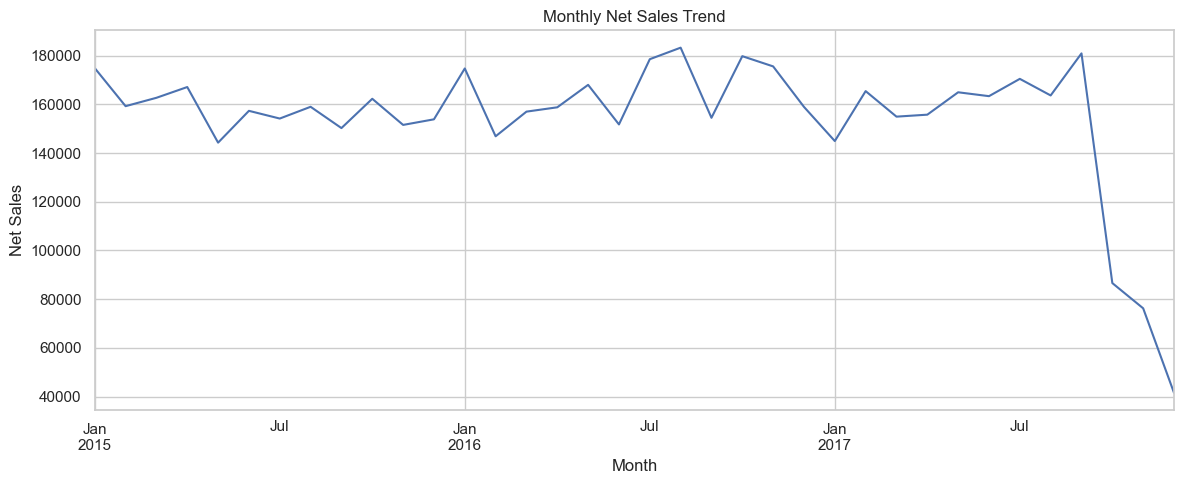

In [15]:
# Group and plot
monthly_sales = orders.groupby(orders['order_date'].dt.to_period('M'))['net_sales'].sum()

plt.figure(figsize=(12, 5))
monthly_sales.plot()
plt.title('Monthly Net Sales Trend')
plt.xlabel('Month')
plt.ylabel('Net Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


In [56]:
print("Last order date:", orders['order_date'].max())


Last order date: 2017-12-31 00:00:00


In [57]:
# Orders by month
orders['year_month'] = orders['order_date'].dt.to_period('M')
order_counts = orders['year_month'].value_counts().sort_index()
print(order_counts)


year_month
2015-01     982
2015-02     865
2015-03     929
2015-04     942
2015-05     816
2015-06     871
2015-07     881
2015-08     878
2015-09     848
2015-10     886
2015-11     854
2015-12     869
2016-01     974
2016-02     820
2016-03     870
2016-04     901
2016-05     965
2016-06     866
2016-07     984
2016-08    1034
2016-09     894
2016-10    1027
2016-11     962
2016-12     917
2017-01     841
2017-02     910
2017-03     896
2017-04     874
2017-05     895
2017-06     873
2017-07     907
2017-08     871
2017-09     935
2017-10     363
2017-11     348
2017-12     323
Freq: M, Name: count, dtype: int64


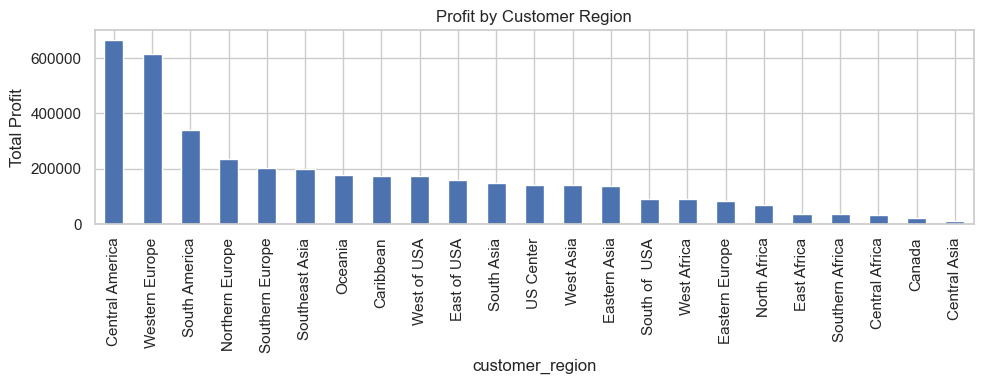

In [16]:
# 12. Profit by Region
region_profit = orders.groupby('customer_region')['profit'].sum().sort_values(ascending=False)
region_profit.plot(kind='bar', figsize=(10,4), title="Profit by Customer Region")
plt.ylabel("Total Profit")
plt.tight_layout()
plt.show()


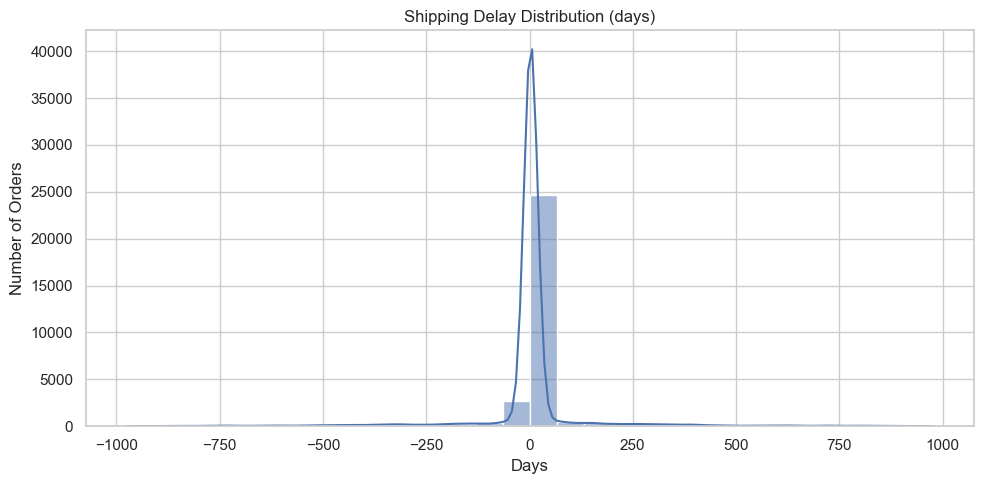

In [17]:
# Shipping delay calculation
orders['shipping_delay'] = (
    pd.to_datetime(
        orders.rename(columns={
            'shipment_year': 'year',
            'shipment_month': 'month',
            'shipment_day': 'day'
        })[['year', 'month', 'day']]
    ) - 
    pd.to_datetime(
        orders.rename(columns={
            'order_year': 'year',
            'order_month': 'month',
            'order_day': 'day'
        })[['year', 'month', 'day']]
    )
).dt.days

# Plot the histogram
plt.figure(figsize=(10, 5))
sns.histplot(orders['shipping_delay'], bins=30, kde=True)
plt.title("Shipping Delay Distribution (days)")
plt.xlabel("Days")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()


In [18]:
# Merge with inventory on product and month
orders['order_yearmonth'] = orders['order_yearmonth'].astype(str)
inventory['year_month'] = inventory['year_month'].astype(str)

orders_inventory_merged = pd.merge(
    orders, inventory,
    how='left',
    left_on=['product_name', 'order_yearmonth'],
    right_on=['product_name', 'year_month']
)


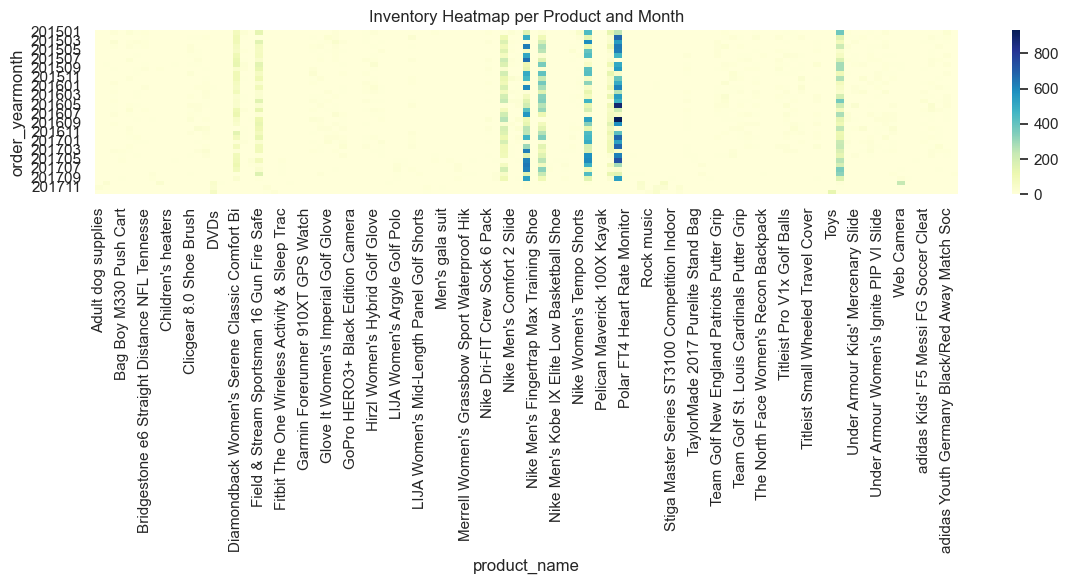

In [19]:
#Inventory heatmap 
pivot_inventory = orders_inventory_merged.pivot_table(
    index='order_yearmonth', columns='product_name', values='warehouse_inventory', aggfunc='mean'
)

plt.figure(figsize=(12,6))
sns.heatmap(pivot_inventory.fillna(0), cmap='YlGnBu')
plt.title("Inventory Heatmap per Product and Month")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


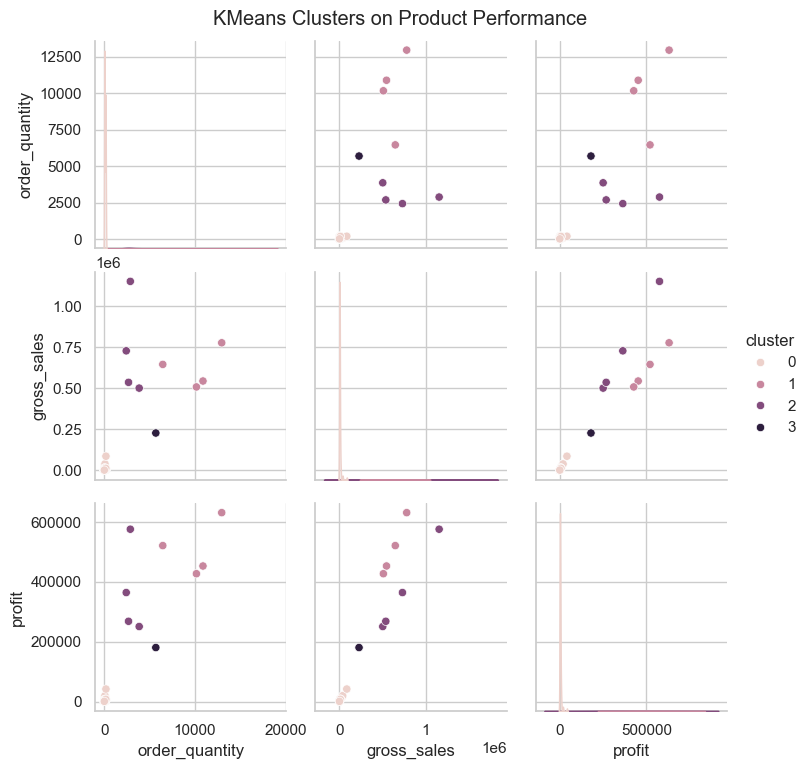

In [20]:
# Clustering products based on performance
product_sales = orders.groupby('product_name')[['order_quantity', 'gross_sales', 'profit']].sum()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(product_sales)

kmeans = KMeans(n_clusters=4, random_state=42)
product_sales['cluster'] = kmeans.fit_predict(scaled_data)

sns.pairplot(product_sales.reset_index(), hue='cluster', vars=['order_quantity', 'gross_sales', 'profit'])
plt.suptitle("KMeans Clusters on Product Performance", y=1.02)
plt.show()


In [21]:
# Outlier detection on net sales 
q1 = orders['net_sales'].quantile(0.25)
q3 = orders['net_sales'].quantile(0.75)
iqr = q3 - q1
outliers = orders[(orders['net_sales'] < q1 - 1.5 * iqr) | (orders['net_sales'] > q3 + 1.5 * iqr)]
print("Outlier transactions:", outliers.shape[0])


Outlier transactions: 254


/var/folders/y6/gs_xbkrj6m7cztt_25frb3lm0000gn/T/ipykernel_41967/4263336207.py:3: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  plt.tight_layout(); plt.show()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


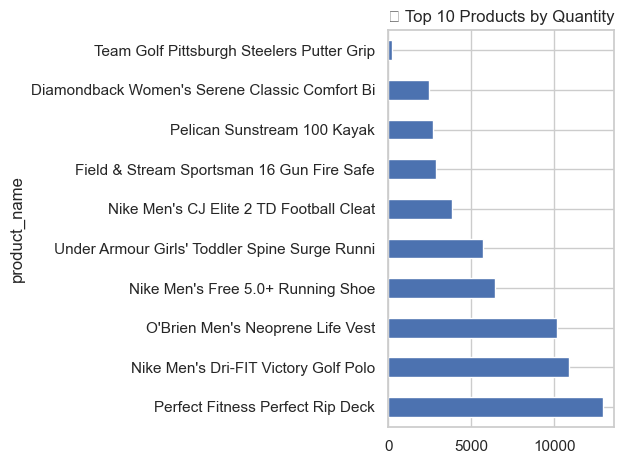

In [58]:
#Top 10 most ordered products 
top_products = orders.groupby('product_name')['order_quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', title="🔥 Top 10 Products by Quantity")
plt.tight_layout(); plt.show()


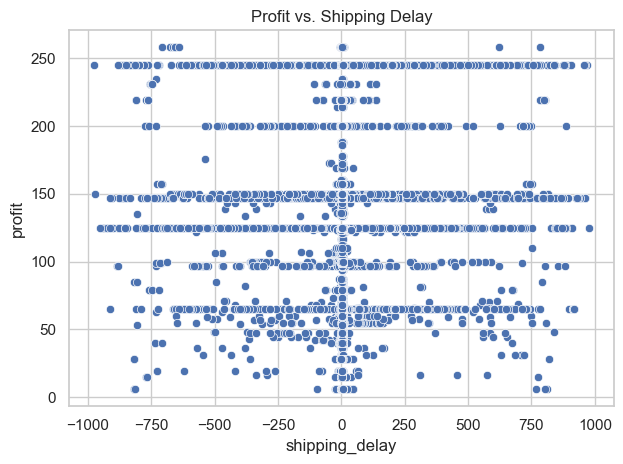

In [25]:
# Profit vs shipping delay 
sns.scatterplot(data=orders, x='shipping_delay', y='profit')
plt.title("Profit vs. Shipping Delay")
plt.tight_layout(); plt.show()


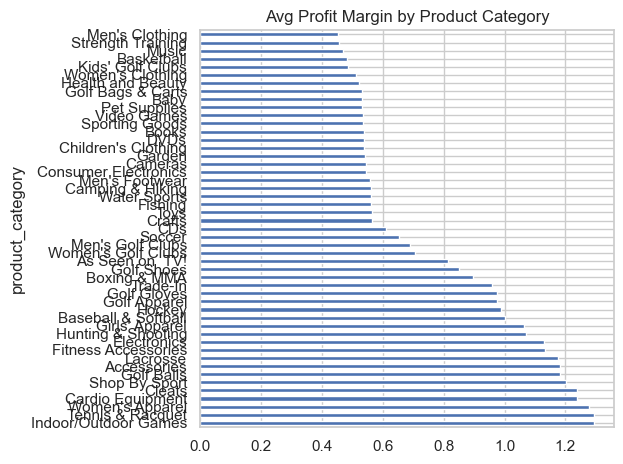

In [26]:
# Profit margin by category 
category_margin = orders.groupby('product_category')['profit_margin'].mean().sort_values(ascending=False)
category_margin.plot(kind='barh', title="Avg Profit Margin by Product Category")
plt.tight_layout(); plt.show()


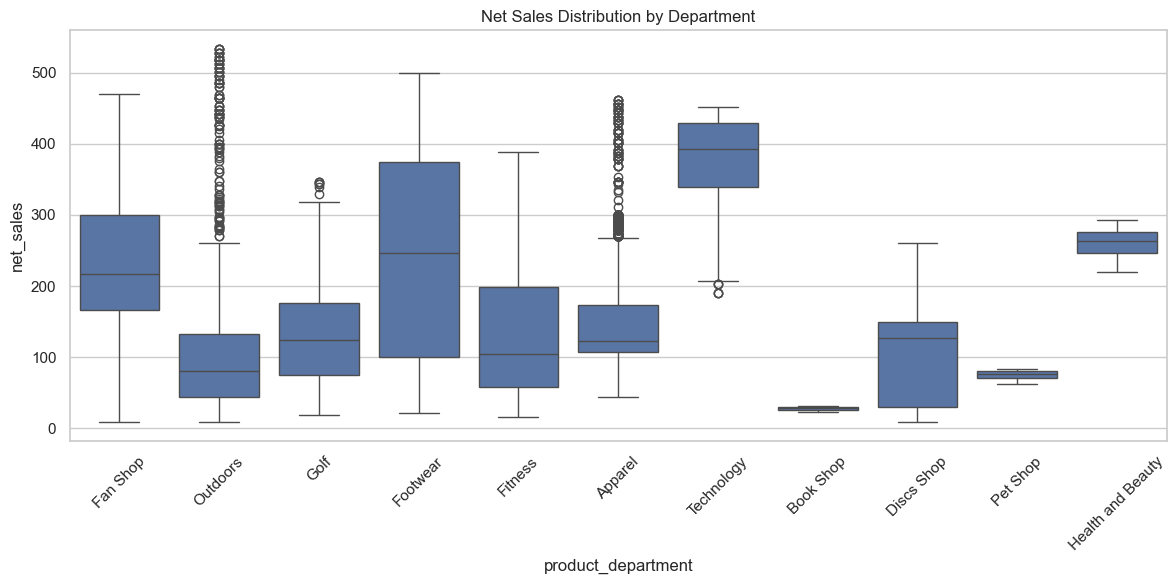

In [27]:
# Net sales distribution by department 
plt.figure(figsize=(12,6))
sns.boxplot(data=orders, x='product_department', y='net_sales')
plt.xticks(rotation=45)
plt.title("Net Sales Distribution by Department")
plt.tight_layout(); plt.show()


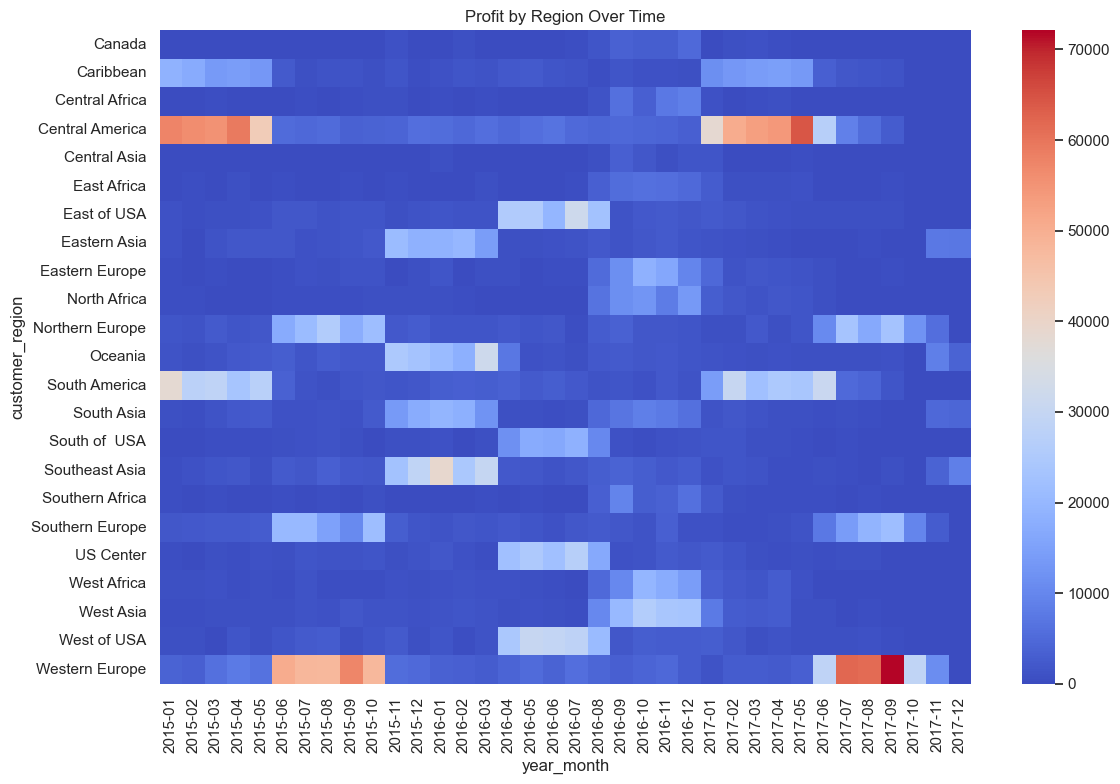

In [28]:
# Heatmap of profit over time by region 
orders['year_month'] = orders['order_date'].dt.to_period('M').astype(str)
pivot = orders.pivot_table(index='customer_region', columns='year_month', values='profit', aggfunc='sum')

plt.figure(figsize=(12,8))
sns.heatmap(pivot.fillna(0), cmap='coolwarm')
plt.title("Profit by Region Over Time")
plt.tight_layout(); plt.show()


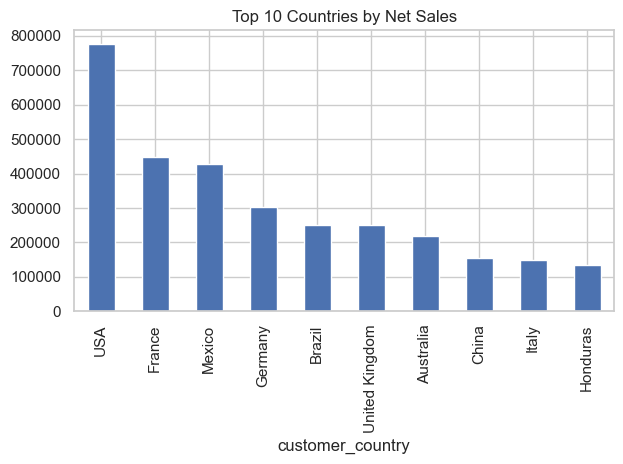

In [29]:
# Country-wise revenue analysis 
country_revenue = orders.groupby('customer_country')['net_sales'].sum().sort_values(ascending=False).head(10)
country_revenue.plot(kind='bar', title="Top 10 Countries by Net Sales")
plt.tight_layout(); plt.show()


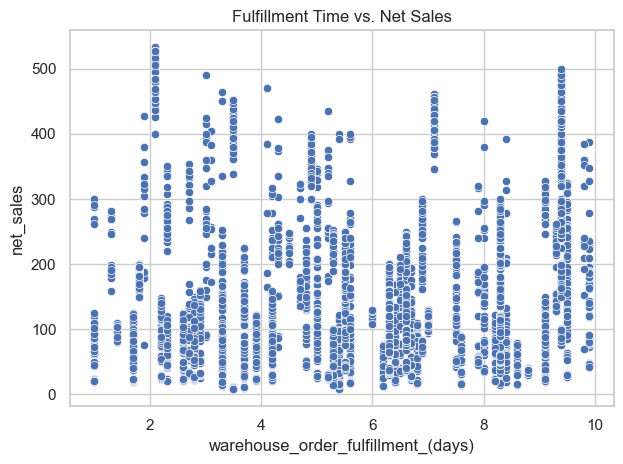

In [30]:
# Fulfillment vs net sales 
orders_fulfilled = pd.merge(orders, fulfillment, on='product_name', how='left')
sns.scatterplot(data=orders_fulfilled, x='warehouse_order_fulfillment_(days)', y='net_sales')
plt.title("Fulfillment Time vs. Net Sales")
plt.tight_layout(); plt.show()


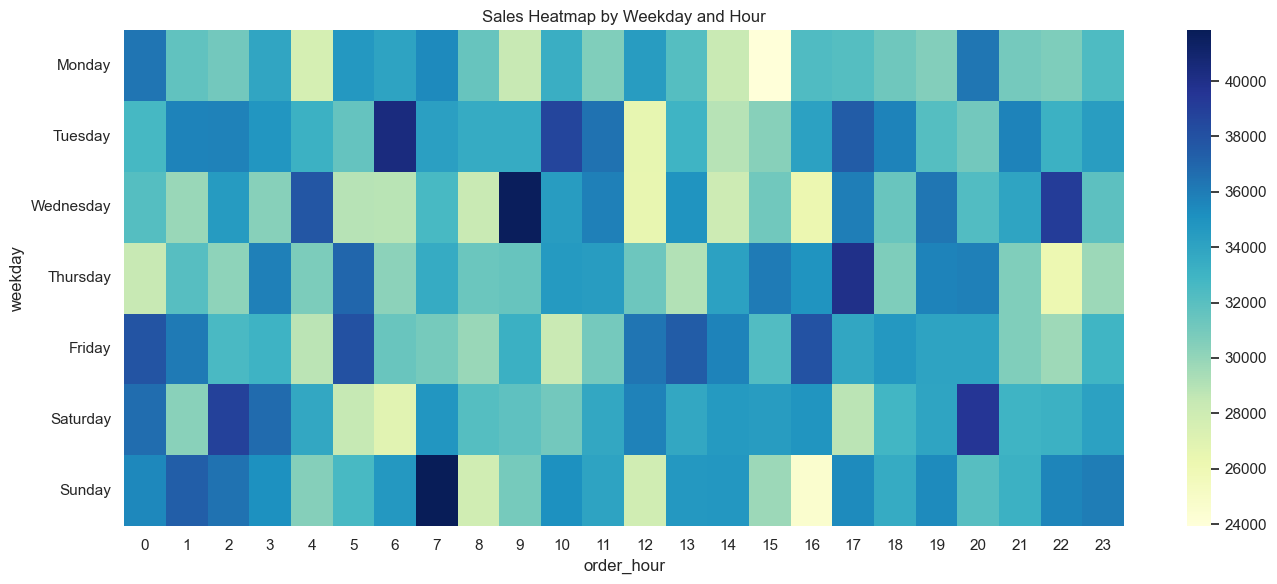

In [31]:
# Hourly and weekday heatmap 
orders['order_hour'] = pd.to_datetime(orders['order_time'], format='%H:%M').dt.hour
orders['weekday'] = orders['order_date'].dt.day_name()

pivot_time = orders.pivot_table(index='weekday', columns='order_hour', values='net_sales', aggfunc='sum')
pivot_time = pivot_time.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.figure(figsize=(14,6))
sns.heatmap(pivot_time.fillna(0), cmap='YlGnBu')
plt.title("Sales Heatmap by Weekday and Hour")
plt.tight_layout(); plt.show()


In [32]:
# 26. Top 10 best selling products funnel 
funnel = orders.groupby('product_name')[['order_quantity', 'net_sales', 'profit_margin']].mean().sort_values(by='net_sales', ascending=False).head(10)
display(funnel)


,order_quantity,net_sales,profit_margin
product_name,,,
Lawn mower,1.000000,479.938657,0.540701
Porcelain crafts,1.000000,412.188235,0.564195
Web Camera,1.000000,405.806073,0.543162
GoPro HERO3+ Black Edition Camera,1.000000,396.000000,0.257602
Garmin Forerunner 910XT GPS Watch,1.000000,379.000000,0.116876
Field & Stream Sportsman 16 Gun Fire Safe,1.000000,358.287700,0.561704
Pelican Maverick 100X Kayak,1.000000,323.000000,0.537152
Children's heaters,1.000000,316.143333,0.538588
TaylorMade White Smoke IN-12 Putter,3.555556,311.555556,0.628030


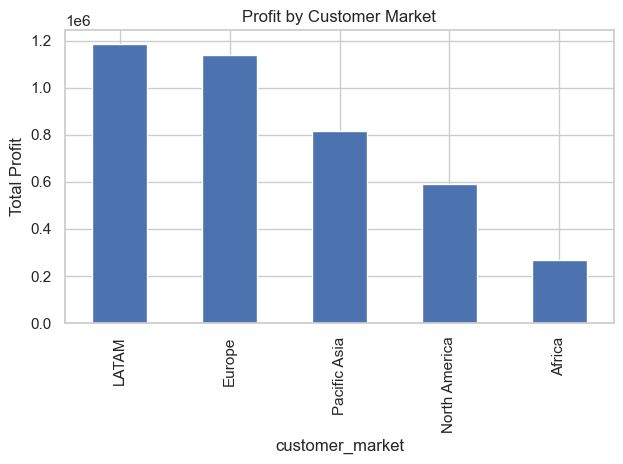

In [33]:
# Market-wise profit 
market_profit = orders.groupby('customer_market')['profit'].sum().sort_values(ascending=False)
market_profit.plot(kind='bar', title="Profit by Customer Market")
plt.ylabel("Total Profit")
plt.tight_layout(); plt.show()


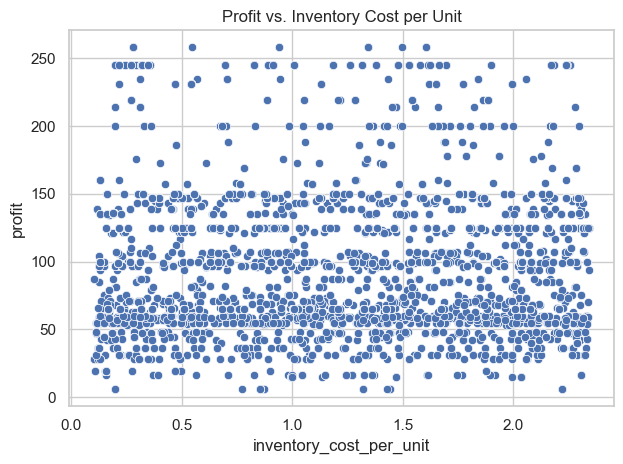

In [34]:
#Profit vs. inventory cost
cost_profit = orders_inventory_merged.dropna(subset=['inventory_cost_per_unit'])

sns.scatterplot(data=cost_profit, x='inventory_cost_per_unit', y='profit')
plt.title("Profit vs. Inventory Cost per Unit")
plt.tight_layout(); plt.show()


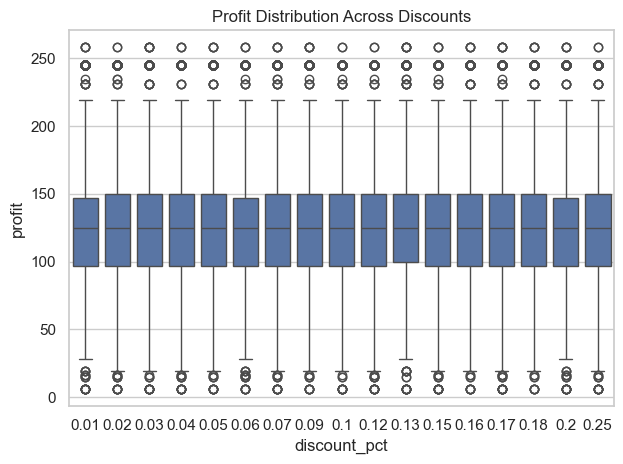

In [35]:
# Profit distribution by discount 
sns.boxplot(data=orders, x='discount_pct', y='profit')
plt.title("Profit Distribution Across Discounts")
plt.tight_layout(); plt.show()


In [36]:
# Top 10 customer contribution 
customer_value = orders.groupby('customer_id')[['net_sales', 'profit']].sum().sort_values(by='profit', ascending=False).head(10)
display(customer_value)


,net_sales,profit
customer_id,,
9897,4169.10,2633
9277,3496.20,2585
5958,3090.04,2310
10447,2982.00,2295
8078,3249.10,2288
11816,3416.95,2246
9876,3119.70,2234
6724,3177.20,2205
10501,3050.20,2191


In [37]:
# Repeat customer rate 
repeat_customers = orders.groupby('customer_id')['order_id'].nunique()
repeat_rate = (repeat_customers > 1).mean()
print(f"Repeat Customer Rate: {repeat_rate:.2%}")


Repeat Customer Rate: 29.49%


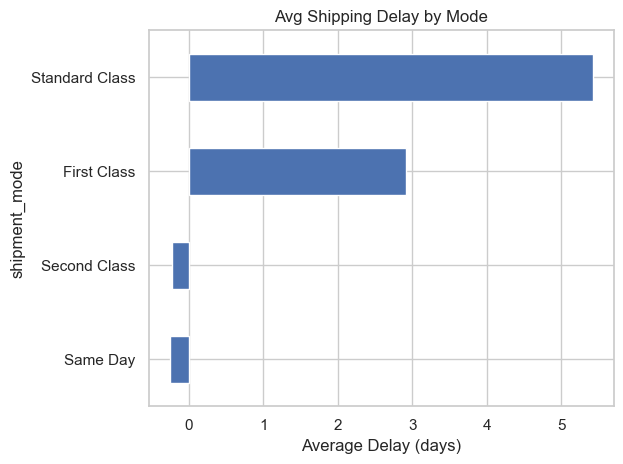

In [38]:
# Shipping mode vs delay 
shipping_mode_delay = orders.groupby('shipment_mode')['shipping_delay'].mean().sort_values()
shipping_mode_delay.plot(kind='barh', title='Avg Shipping Delay by Mode')
plt.xlabel('Average Delay (days)')
plt.tight_layout(); plt.show()


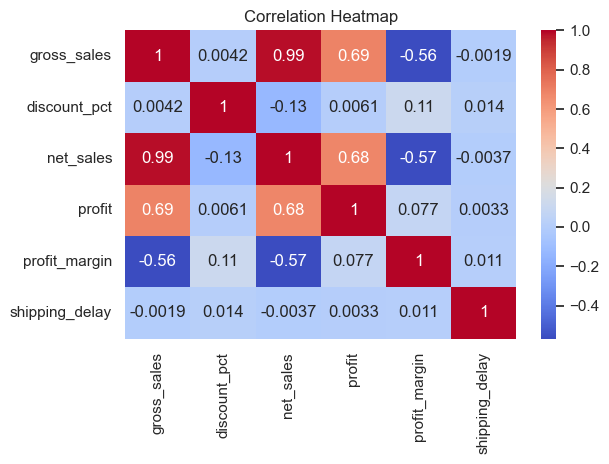

In [39]:
# Correlation matrix 
corr = orders[['gross_sales', 'discount_pct', 'net_sales', 'profit', 'profit_margin', 'shipping_delay']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout(); plt.show()
